# 👻 Ghost on Local
---
[![Phantom](https://img.shields.io/badge/Version-2.0-teal.svg)]()
[![Phantom](https://img.shields.io/badge/Github-👻-black.svg)](https://github.com/Ming-doan/timeseries-imputation.git)

In [1]:
import pandas as pd
from modules.alias import get_by_aliases
from modules.utils.preprocessing import Preprocessing
from modules.utils.missing import CreateMissingDataFrame
from modules.train import Trainer
from modules.models import *
from modules.utils.callbacks import SavePlot, Combined
from modules.utils.generator import WindowGenerator
from modules.utils.cache import Cache

2023-10-25 23:41:56.239067: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 23:41:57.195323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Datasets
DATASET = 'cuaong_processed'
SELECTED_COLUMNS = ['Target']
# Missing values
MISSING_PERCENTAGE = 5.
MISSING_GAPS = 1
SEED = 42
MODE = 'Random' # 'Random', 'Linear'
# Models
WINDOW_SIZE = 10
BATCH_SIZE = 1
MODELS = get_by_aliases(['cnn1d'])

2023-10-25 23:41:58.934309: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-25 23:41:58.979089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-25 23:41:58.979427: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### Preprocessing

In [3]:
import os
if not os.path.exists('results'):
    os.makedirs('results')

In [4]:
# Read CSV
df = pd.read_csv(f'{DATASET}.csv')
df = df[SELECTED_COLUMNS]

In [5]:
# Preprocessing data
preprocessing = Preprocessing()
df = preprocessing.flow(df)

In [6]:
# Create missing data
creator = CreateMissingDataFrame(df, MISSING_PERCENTAGE, MISSING_GAPS, split_mode=MODE, seed=SEED)

2023-10-25 23:41:59.231 | SUCCESS  | modules.utils.missing:__dropping_dataframe:150 - Dropped dataframe successfully. Missing indexs: [(7270, 7762)]


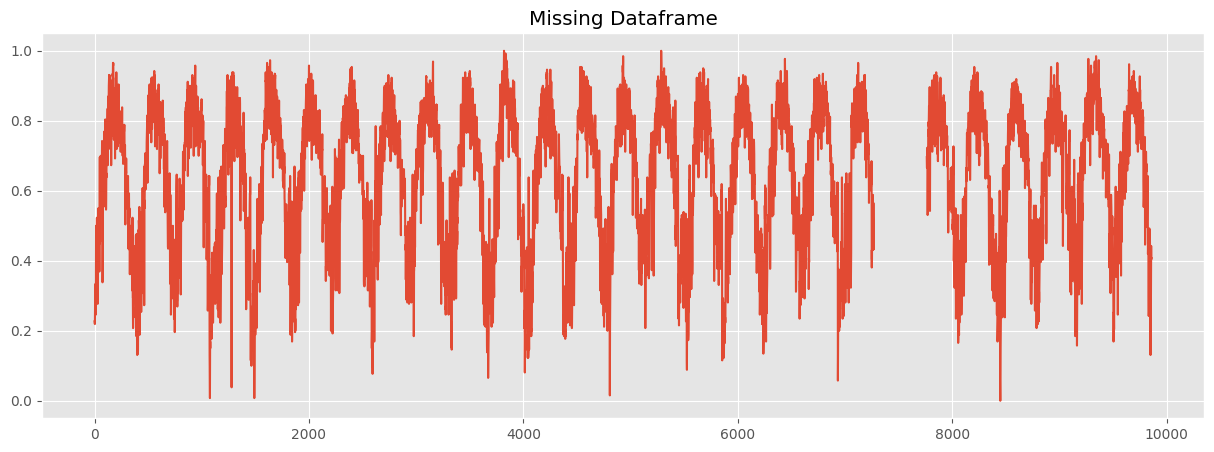

In [7]:
creator.plot(save_path='results/missing_data.png')

### Training

2023-10-25 23:41:59.619 | INFO     | modules.train:train:61 - Model 1/1: CNN1D
2023-10-25 23:41:59.621 | INFO     | modules.train:train:66 - Fitting the model CNN1D


CNN1D model summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (1, 8, 128)               512       
                                                                 
 conv1d_1 (Conv1D)           (1, 6, 128)               49280     
                                                                 
 max_pooling1d (MaxPooling1  (1, 3, 128)               0         
 D)                                                              
                                                                 
 flatten (Flatten)           (1, 384)                  0         
                                                                 
 dense (Dense)               (1, 64)                   24640     
                                                                 
 dense_1 (Dense)             (1, 1)                    65        
                                   

2023-10-25 23:42:00.734614: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-25 23:42:01.022723: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff500006cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-25 23:42:01.022796: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-10-25 23:42:01.028735: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-25 23:42:01.172105: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7260/7260 [==============================] - 30s 4ms/step - loss: 0.0066
Epoch 2/200
7260/7260 [==============================] - 27s 4ms/step - loss: 0.0049
Epoch 3/200
7260/7260 [==============================] - 26s 4ms/step - loss: 0.0046
Epoch 4/200
7260/7260 [==============================] - 27s 4ms/step - loss: 0.0043
Epoch 5/200
7260/7260 [==============================] - 23s 3ms/step - loss: 0.0043
Epoch 6/200
7260/7260 [==============================] - 24s 3ms/step - loss: 0.0042
Epoch 7/200
7260/7260 [==============================] - 25s 3ms/step - loss: 0.0041
Epoch 8/200
7260/7260 [==============================] - 27s 4ms/step - loss: 0.0041
Epoch 9/200
7260/7260 [==============================] - 22s 3ms/step - loss: 0.0040
Epoch 10/200
7260/7260 [==============================] - 16s 2ms/step - loss: 0.0040
Epoch 11/200
7260/7260 [==============================] - 16s 2ms/step - loss: 0.0040
Epoch 12/200
7260/7260 [==============================] - 23s 3ms/step - lo

2023-10-25 23:51:23.464 | INFO     | modules.train:train:92 - Training completed in 563.84s


482/482 [==============================] - 1s 1ms/step


2023-10-25 23:51:24.461 | INFO     | modules.train:train:126 - Similarity on predicting: 0.9567410584779531


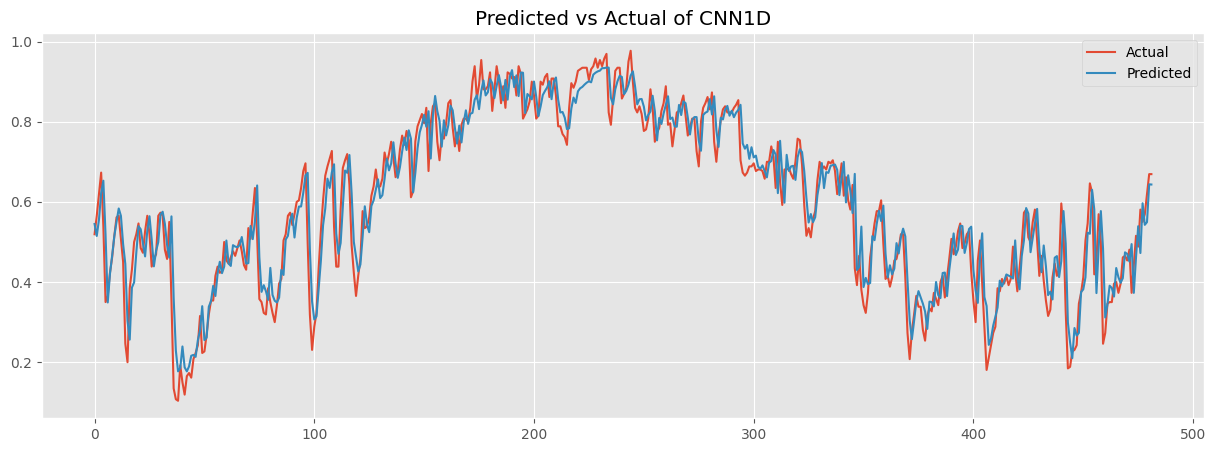

Forecasting CNN1D: 100%|██████████| 492/492 [00:23<00:00, 20.78it/s]
2023-10-25 23:51:48.325 | INFO     | modules.train:train:141 - Similarity on forecasting: 0.8408967196787418


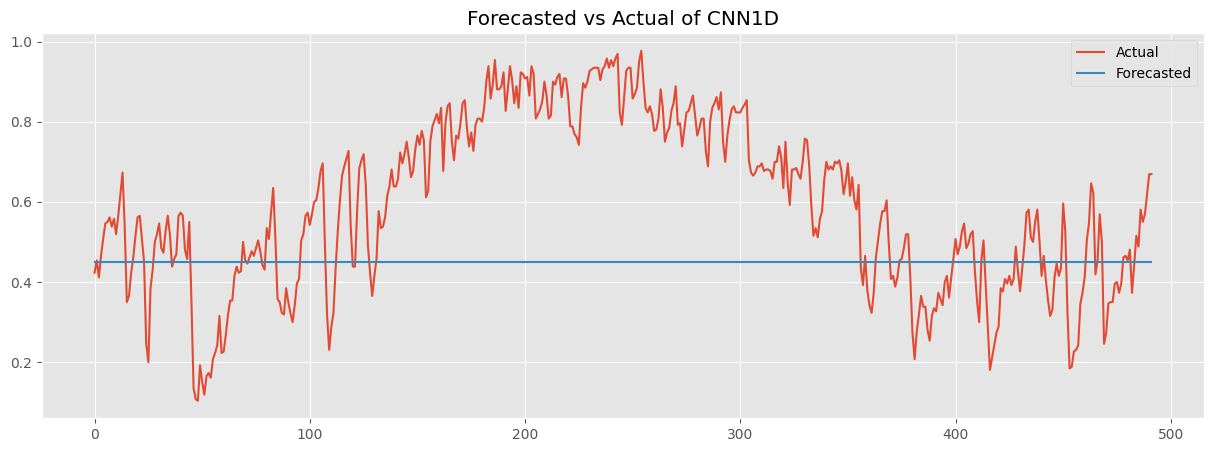

2023-10-25 23:51:48.594 | SUCCESS  | modules.train:train:149 - Model 1/1~CNN1D completed.
2023-10-25 23:51:48.594 | INFO     | modules.train:reset:41 - All models have been reset.
2023-10-25 23:51:48.595 | INFO     | modules.train:train:61 - Model 1/1: CNN1D
2023-10-25 23:51:48.595 | INFO     | modules.train:train:66 - Fitting the model CNN1D


CNN1D model summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (1, 8, 128)               512       
                                                                 
 conv1d_1 (Conv1D)           (1, 6, 128)               49280     
                                                                 
 max_pooling1d (MaxPooling1  (1, 3, 128)               0         
 D)                                                              
                                                                 
 flatten (Flatten)           (1, 384)                  0         
                                                                 
 dense (Dense)               (1, 64)                   24640     
                                                                 
 dense_1 (Dense)             (1, 1)                    65        
                                 

2023-10-25 23:52:32.009 | INFO     | modules.train:train:92 - Training completed in 43.41s


482/482 [==============================] - 1s 2ms/step


2023-10-25 23:52:33.028 | INFO     | modules.train:train:126 - Similarity on predicting: 0.9576557074374984


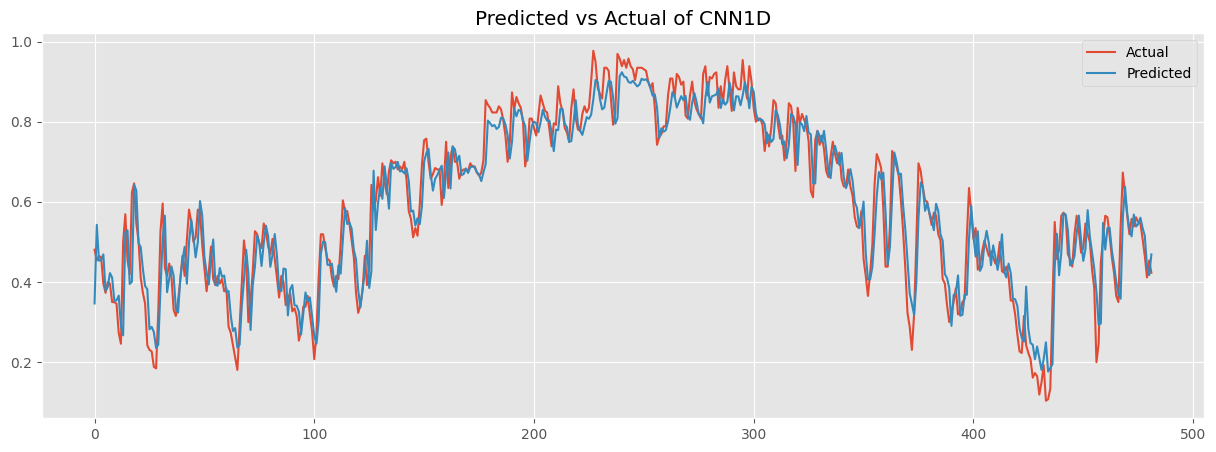

Forecasting CNN1D: 100%|██████████| 492/492 [00:21<00:00, 22.89it/s]
2023-10-25 23:52:54.697 | INFO     | modules.train:train:141 - Similarity on forecasting: 0.8485868179650589


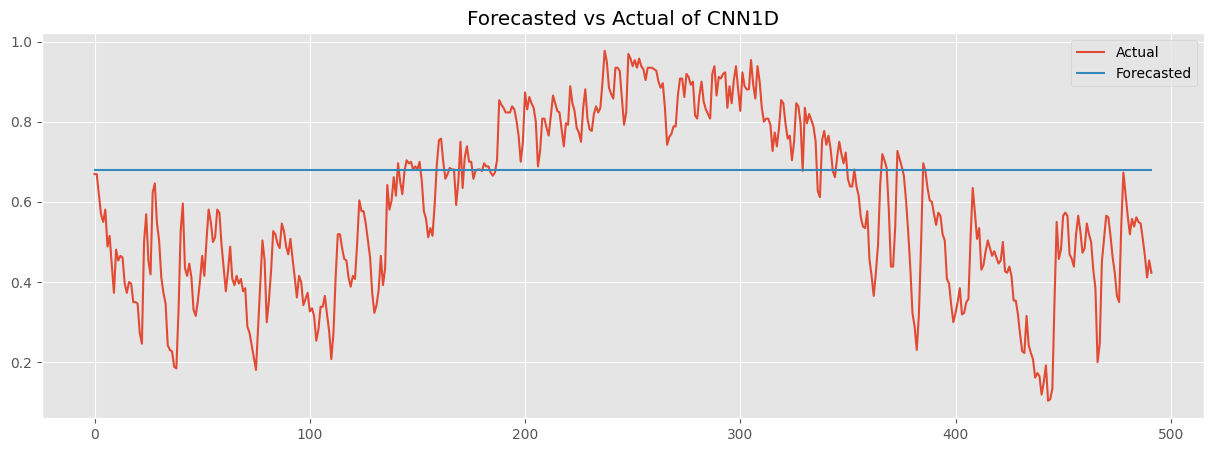

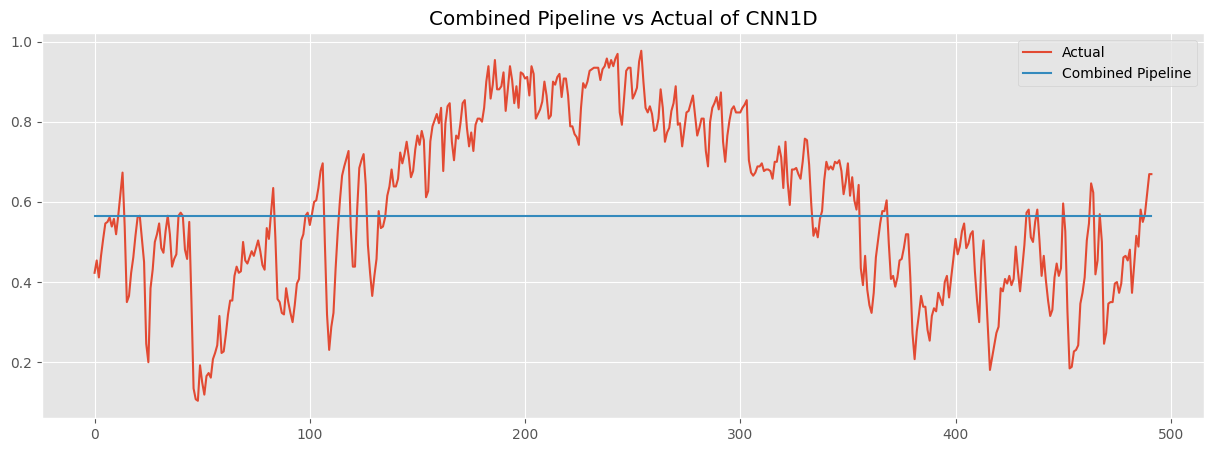

2023-10-25 23:52:55.177 | INFO     | modules.utils.callbacks:after_forecast:156 - Similarity on combining of model CNN1D: 0.8547787139773494
2023-10-25 23:52:55.178 | SUCCESS  | modules.train:train:149 - Model 1/1~CNN1D completed.
2023-10-25 23:52:55.178 | INFO     | modules.train:reset:41 - All models have been reset.


In [8]:
# Training
trainer = Trainer(model=MODELS)
combined_callback = Combined(n_models=len(MODELS), save_directory="results")
sp = SavePlot(n_models=len(MODELS), save_directory="results")
cache = Cache(live_cache=True)

for train_df, test_df in creator:
    train_gen = WindowGenerator(train_df, WINDOW_SIZE, BATCH_SIZE)
    test_gen = WindowGenerator(test_df, WINDOW_SIZE, BATCH_SIZE)

    trainer.train(train_gen, test_gen, callbacks=[sp, combined_callback], cache=cache)
    trainer.reset()

In [9]:
combined_callback.metrics.metrics.to_csv('results/metrics.csv', index=False)
combined_callback.metrics.metrics

,Model,Similarity,NMAE,RMSE,R2,FSD,FB,FA2
0,CNN1D,0.854779,0.180192,0.211737,0.0,1.999999,-0.049274,0.930894
